In [24]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg as AR

importing all the classifiers

In [25]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans

In [26]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from scipy.optimize import linear_sum_assignment

In [27]:
from sklearn.linear_model import SGDClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [28]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [29]:
df=pd.read_csv("/content/drive/MyDrive/Minor_project6thsem/Datasets/DDoS SDN Tree/DDoS-SDN-Tree.csv")

In [36]:
df.head()

,dt,switch,src,dst,bytecount,dur,dur_nsec,tot_dur,flows,packetins,...,eth.dst,ip.proto,tcp.srcport,tcp.dstport,tcp.analysis.ack_rtt,udp.srcport,udp.dstport,frame.time_delta,label,interval_start
0,0.000000e+00,3.0,10.0.0.1,10.0.0.7,1365900.0,0.0,0.000000e+00,0.000000e+00,2.0,1,...,00:00:00:00:00:07,6.0,1161.0,80.0,0.0,0.0,0.0,0.0,0,1.683836e+09
1,2.956400e+04,7.0,10.0.0.7,10.0.0.1,423846.0,0.0,2.956400e+04,2.956400e+04,2.0,1,...,00:00:00:00:00:01,6.0,80.0,1161.0,2960.0,0.0,0.0,30.0,0,1.683836e+09
2,1.000731e+09,3.0,10.0.0.1,10.0.0.7,1365900.0,1001.0,1.000731e+09,2.001731e+09,2.0,1,...,00:00:00:00:00:07,6.0,1162.0,80.0,0.0,0.0,0.0,1000731.0,0,1.683836e+09
3,2.932500e+04,7.0,10.0.0.7,10.0.0.1,423846.0,0.0,2.932500e+04,2.932500e+04,2.0,1,...,00:00:00:00:00:01,6.0,80.0,1162.0,2926.0,0.0,0.0,29.0,0,1.683836e+09
4,8.755927e+08,3.0,10.0.0.1,10.0.0.7,1365900.0,876.0,8.755927e+08,1.751593e+09,5.0,1,...,00:00:00:00:00:07,6.0,1163.0,80.0,0.0,0.0,0.0,875593.0,0,1.683836e+09


In [30]:
df['label'].unique()

array([0, 1])

Exploratory data Analysis

In [31]:
df.shape

(164899, 35)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164899 entries, 0 to 164898
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   dt                    164899 non-null  float64
 1   switch                164899 non-null  float64
 2   src                   164899 non-null  object 
 3   dst                   164899 non-null  object 
 4   bytecount             164899 non-null  float64
 5   dur                   164899 non-null  float64
 6   dur_nsec              164899 non-null  float64
 7   tot_dur               164899 non-null  float64
 8   flows                 164899 non-null  float64
 9   packetins             164899 non-null  int64  
 10  pktperflow            164899 non-null  float64
 11  byteperflow           164899 non-null  float64
 12  pktrate               164899 non-null  float64
 13  Pairflow              164899 non-null  float64
 14  Protocol              164899 non-null  object 
 15  

In [33]:
df.describe()

,dt,switch,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,...,frame.time_epoch,frame.len,tcp.srcport,tcp.dstport,tcp.analysis.ack_rtt,udp.srcport,udp.dstport,frame.time_delta,label,interval_start
count,1.648990e+05,164899.000000,1.648990e+05,1.648990e+05,1.648990e+05,1.648990e+05,164899.00000,164899.000000,164899.000000,1.648990e+05,...,1.648990e+05,164899.000000,164899.000000,164899.000000,1.648990e+05,164899.000000,164899.0,1.648990e+05,164899.000000,1.648990e+05
mean,1.573215e+09,4.880042,1.783382e+06,1.573204e+03,1.573215e+09,3.146418e+09,2729.97812,0.442768,11591.543690,1.792233e+11,...,1.683981e+09,148.358219,845.418250,822.901285,2.330179e+04,4021.007156,0.0,2.583653e+05,0.529300,1.683981e+09
std,8.109421e+11,1.833604,1.062438e+06,8.109421e+05,8.109421e+11,1.621884e+12,4806.16783,0.496715,5841.919267,1.995070e+11,...,8.586460e+04,43.161896,2029.951978,1993.499722,1.107309e+05,11671.326617,0.0,4.125100e+05,0.499142,8.586446e+04
min,-1.805380e+14,0.000000,3.283200e+05,-1.805380e+08,-1.805380e+14,-3.610760e+14,1.00000,0.000000,4786.000000,5.400000e+07,...,1.683836e+09,54.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,-1.168800e+04,0.000000,1.683836e+09
25%,1.645100e+04,3.000000,1.057920e+06,0.000000e+00,1.645100e+04,1.645100e+04,5.00000,0.000000,7269.000000,3.021408e+08,...,1.683902e+09,162.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,1.700000e+01,0.000000,1.683902e+09
50%,2.956400e+04,4.000000,1.365900e+06,0.000000e+00,2.956400e+04,2.956400e+04,5.00000,0.000000,8206.000000,8.476920e+10,...,1.684031e+09,162.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,3.000000e+01,1.000000,1.684031e+09
75%,4.616805e+08,7.000000,2.266056e+06,4.620000e+02,4.616805e+08,9.236805e+08,7269.00000,1.000000,13988.000000,2.659068e+11,...,1.684036e+09,174.000000,80.000000,80.000000,0.000000e+00,3994.500000,0.0,4.605865e+05,1.000000,1.684036e+09
max,1.412255e+14,7.000000,3.478788e+06,1.412255e+08,1.412255e+14,2.824510e+14,14999.00000,1.000000,21474.000000,3.195774e+12,...,1.684101e+09,190.000000,9562.000000,9562.000000,1.283029e+06,65535.000000,0.0,1.019493e+06,1.000000,1.684101e+09


column names

In [34]:
column_names=df.columns
column_names

Index(['dt', 'switch', 'src', 'dst', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'Protocol', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps',
       'rx_kbps', 'tot_kbps', 'frame.number', 'frame.time_epoch', 'frame.len',
       'eth.src', 'eth.dst', 'ip.proto', 'tcp.srcport', 'tcp.dstport',
       'tcp.analysis.ack_rtt', 'udp.srcport', 'udp.dstport',
       'frame.time_delta', 'label', 'interval_start'],
      dtype='object')

Null values sum

Text(0, 0.5, 'Count')

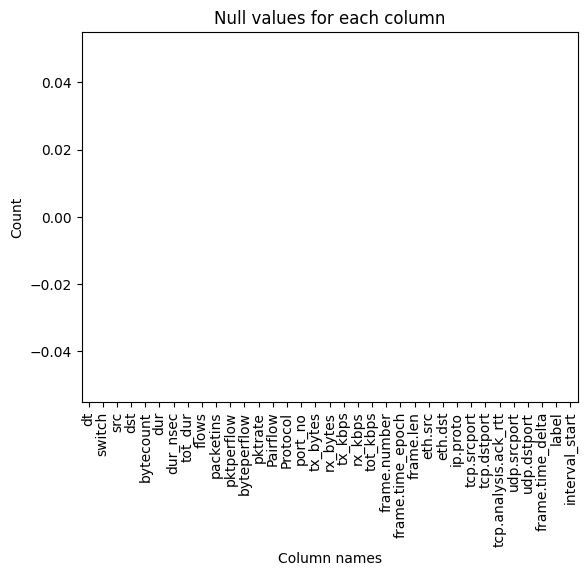

In [35]:
df.isnull().sum().plot.bar()
plt.title("Null values for each column")
plt.xlabel("Column names")
plt.ylabel("Count")

dropping rows having Null values

In [36]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164899 entries, 0 to 164898
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   dt                    164899 non-null  float64
 1   switch                164899 non-null  float64
 2   src                   164899 non-null  object 
 3   dst                   164899 non-null  object 
 4   bytecount             164899 non-null  float64
 5   dur                   164899 non-null  float64
 6   dur_nsec              164899 non-null  float64
 7   tot_dur               164899 non-null  float64
 8   flows                 164899 non-null  float64
 9   packetins             164899 non-null  int64  
 10  pktperflow            164899 non-null  float64
 11  byteperflow           164899 non-null  float64
 12  pktrate               164899 non-null  float64
 13  Pairflow              164899 non-null  float64
 14  Protocol              164899 non-null  object 
 15  

Getting Unique destination

In [37]:
uniq_dest=df['dst'].unique()
total_dst=len(uniq_dest)
print("Total destination :",total_dst)
print("Different destination:" ,uniq_dest)

Total destination : 4
Different destination: ['10.0.0.7' '10.0.0.1' '10.0.0.2' '10.0.0.3']


doing analysis for malicious and normal traffic

Text(0.5, 1.0, 'Traffic for normal and Malicious Traffic')

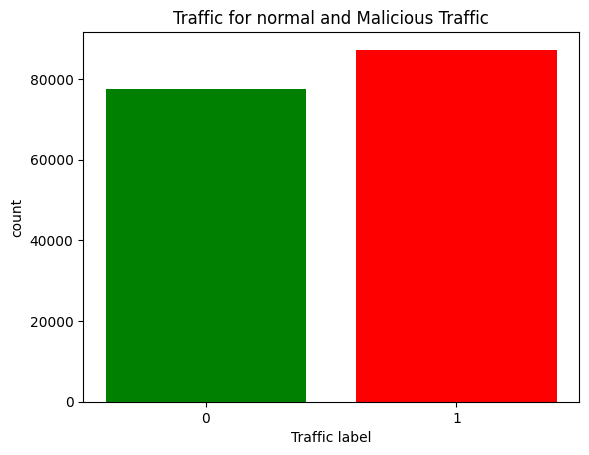

In [38]:
gp=df.groupby('label')['label'].count()
plt.bar(list(gp.index),list(gp.values),color=['g','r'])
plt.xticks(list(gp.index))
plt.xlabel("Traffic label")
plt.ylabel("count")
plt.title("Traffic for normal and Malicious Traffic")

Text(0.5, 1.0, 'Attack and Normal traffic')

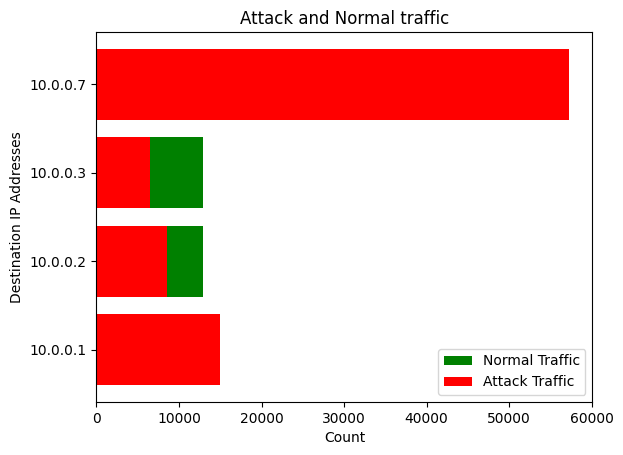

In [39]:
ip_addr=df[df['label']==0].groupby('dst').count()['label'].index
normal_traffic=df.groupby(['dst','label']).size().unstack().fillna(0)[0]
attack_traffic=df.groupby(['dst','label']).size().unstack().fillna(0)[1]
plt.barh(ip_addr,normal_traffic,color='g',label='Normal Traffic')
plt.barh(ip_addr,attack_traffic,color='r',label='Attack Traffic')
plt.legend()
plt.xlabel("Count")
plt.ylabel("Destination IP Addresses")
plt.title("Attack and Normal traffic")

In [40]:
df.isnull().sum()

,0
dt,0
switch,0
src,0
dst,0
bytecount,0
dur,0
dur_nsec,0
tot_dur,0
flows,0
packetins,0


In [41]:
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns (exclude 'label')
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('label')

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [42]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

dt: 19752 unique values
switch: 4 unique values
src: 4 unique values
dst: 4 unique values
bytecount: 16 unique values
dur: 1024 unique values
dur_nsec: 19752 unique values
tot_dur: 19752 unique values
flows: 17 unique values
packetins: 2 unique values
pktperflow: 14 unique values
byteperflow: 64 unique values
pktrate: 32867 unique values
Pairflow: 47 unique values
Protocol: 3 unique values
port_no: 2 unique values
tx_bytes: 10 unique values
rx_bytes: 10 unique values
tx_kbps: 10 unique values
rx_kbps: 10 unique values
tot_kbps: 16 unique values
frame.number: 15000 unique values
frame.time_epoch: 164899 unique values
frame.len: 4 unique values
eth.src: 5 unique values
eth.dst: 6 unique values
ip.proto: 6 unique values
tcp.srcport: 8964 unique values
tcp.dstport: 8964 unique values
tcp.analysis.ack_rtt: 10175 unique values
udp.srcport: 20395 unique values
udp.dstport: 1 unique values
frame.time_delta: 14055 unique values
label: 2 unique values
interval_start: 9509 unique values


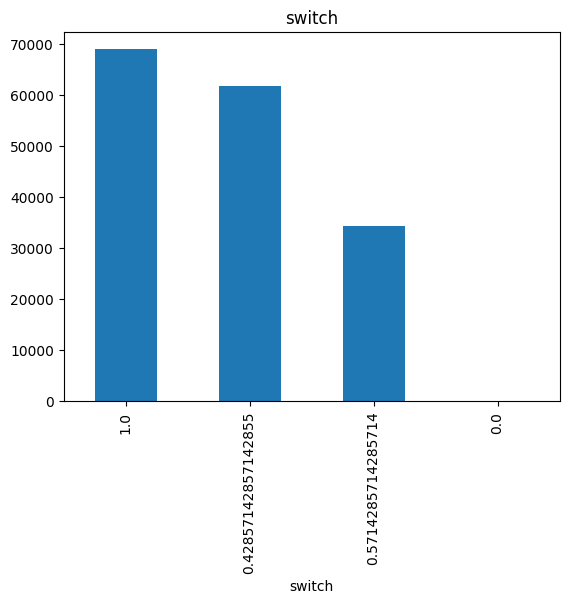

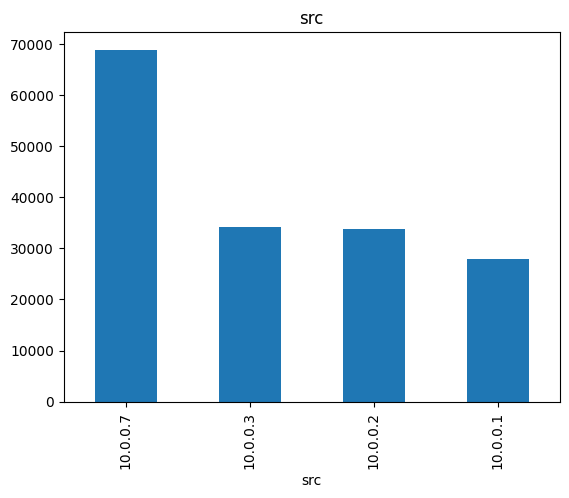

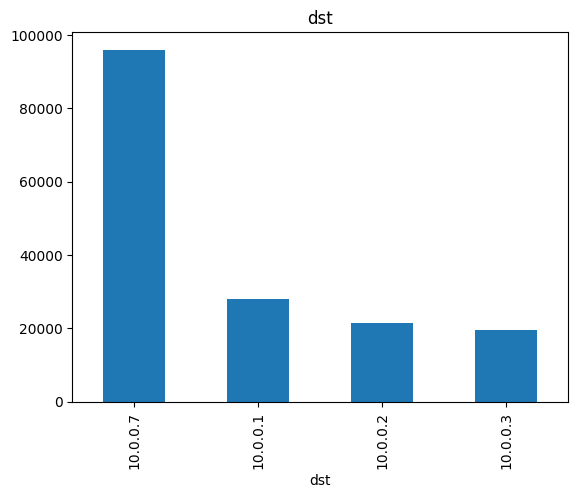

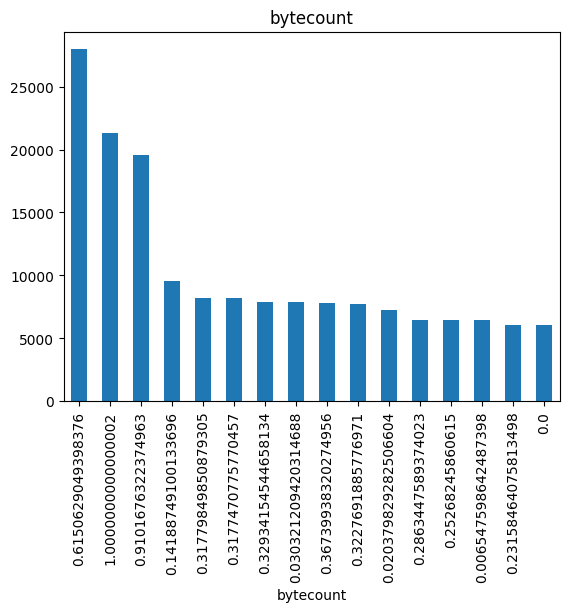

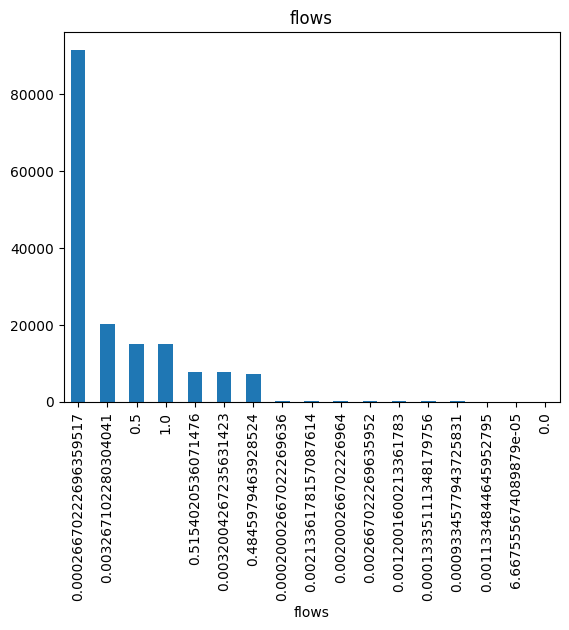

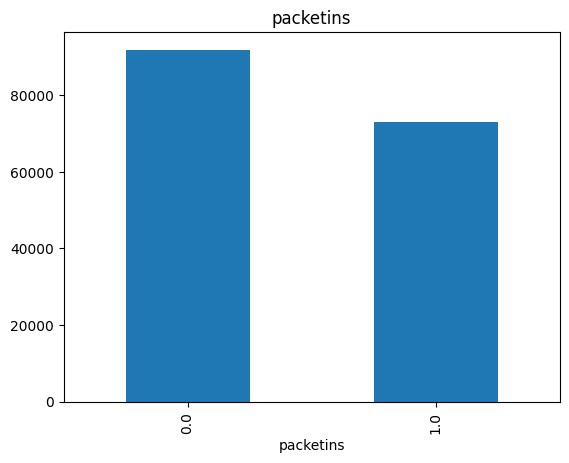

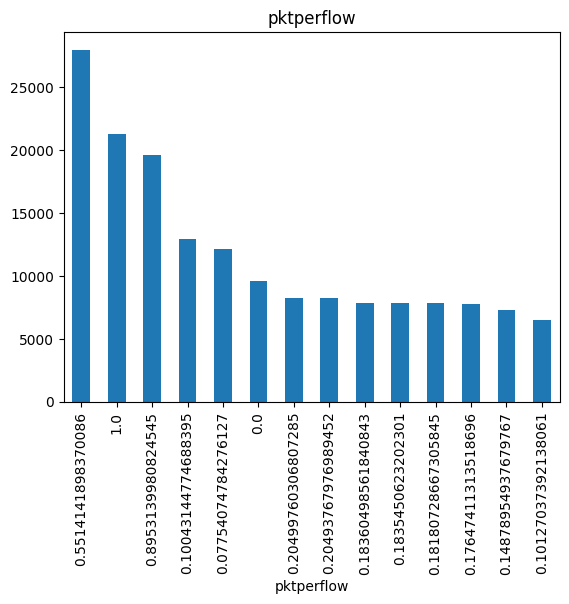

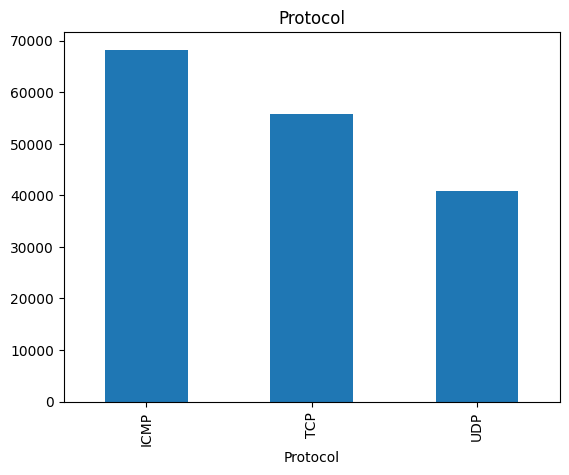

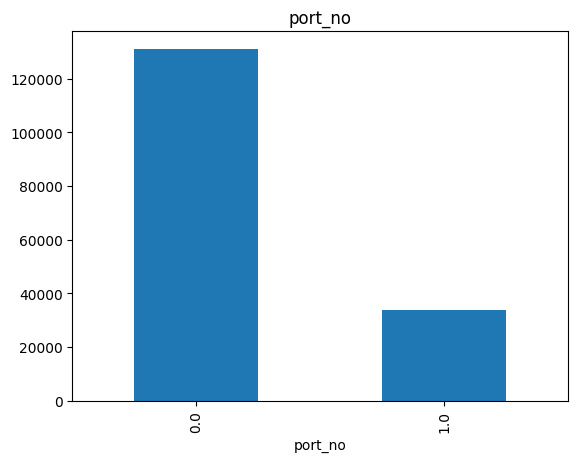

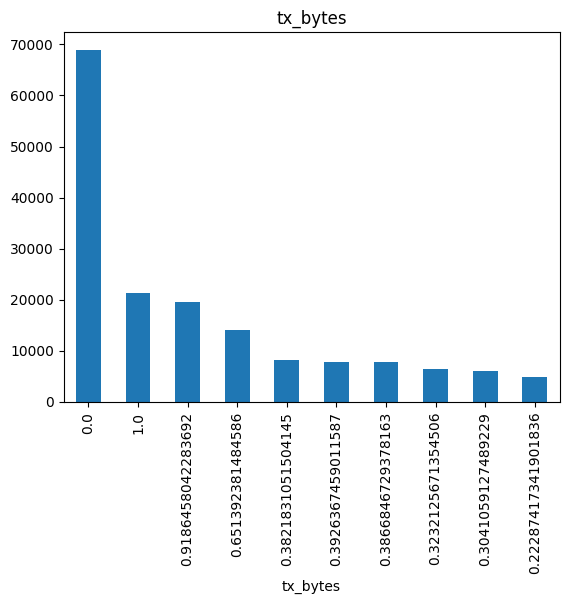

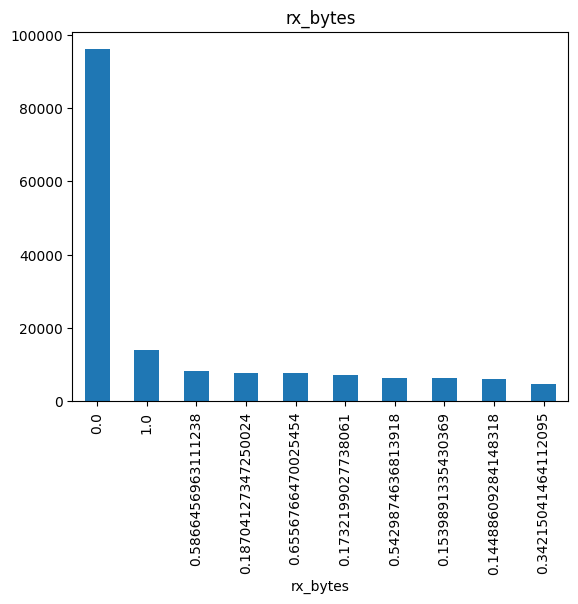

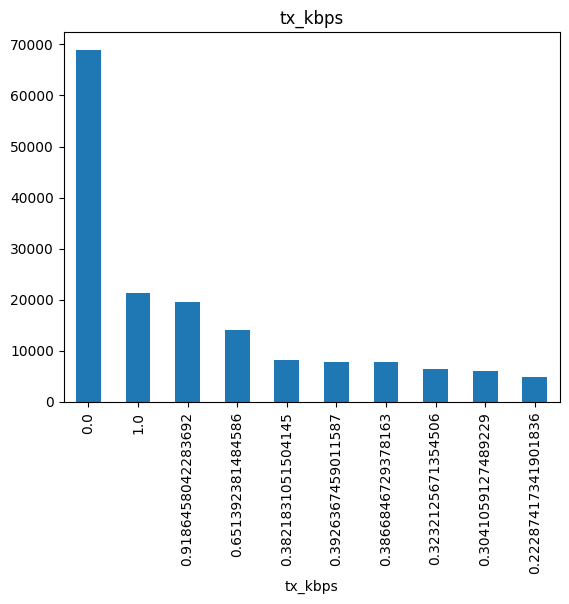

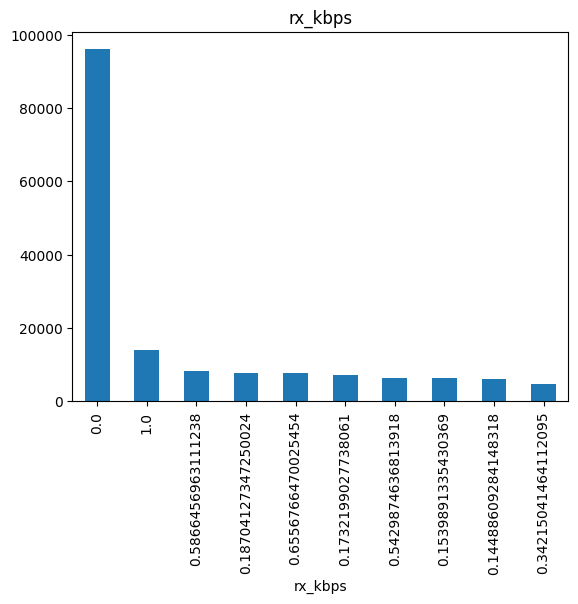

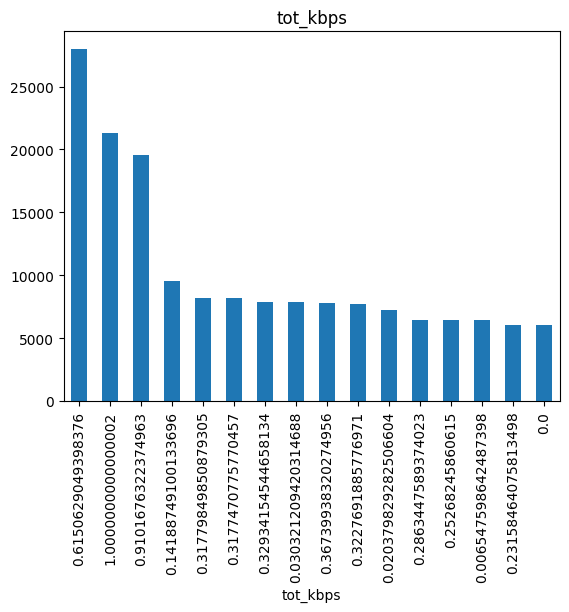

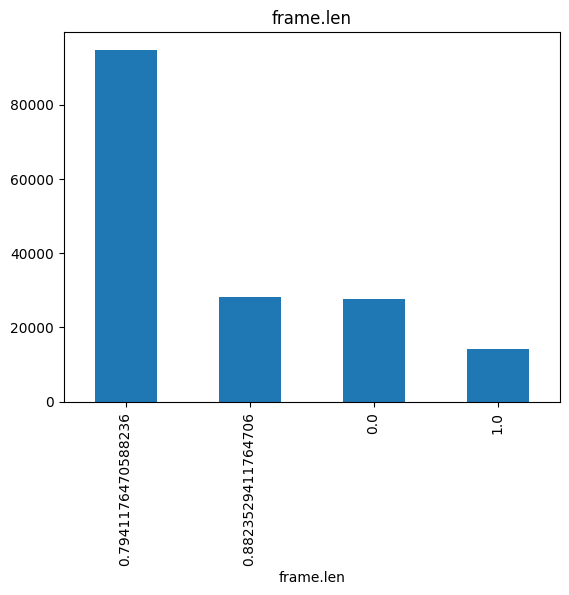

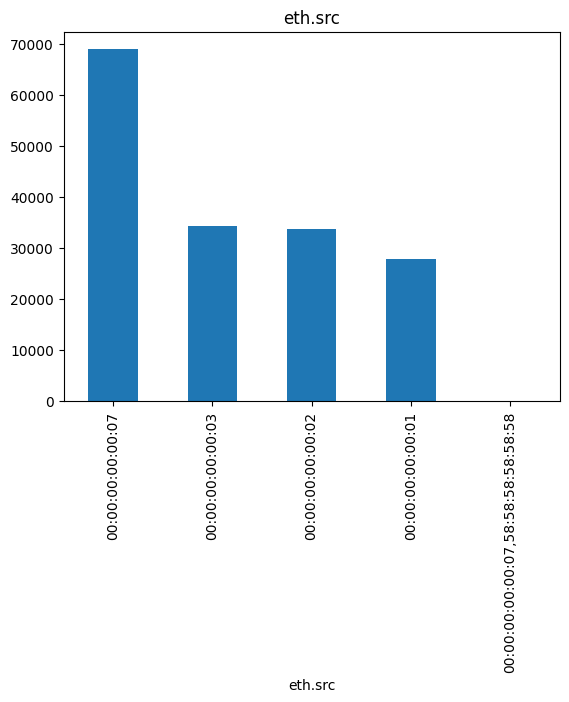

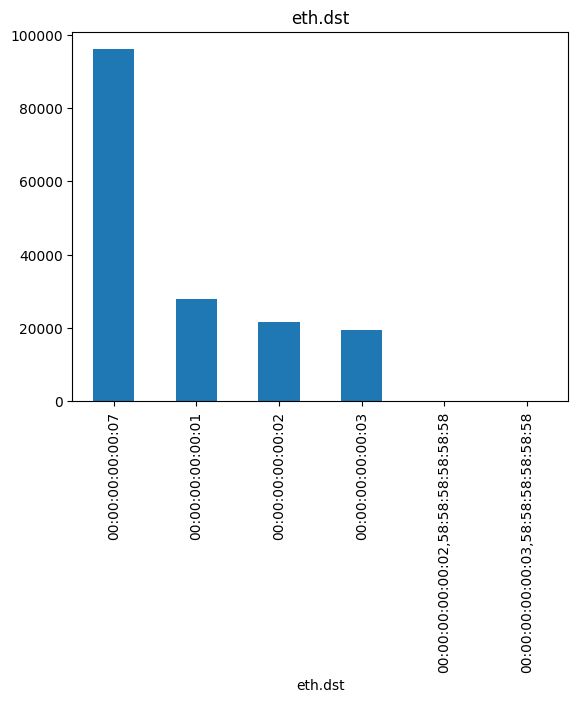

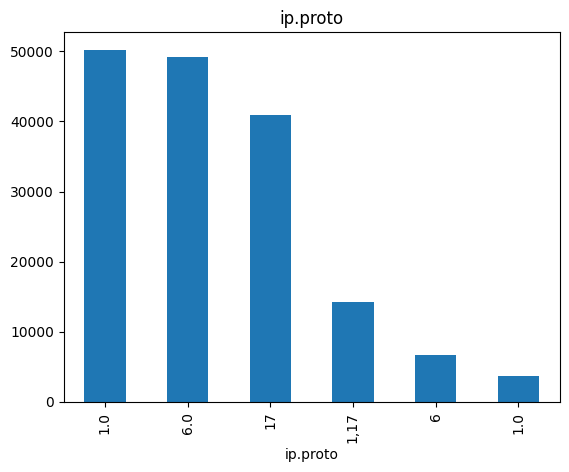

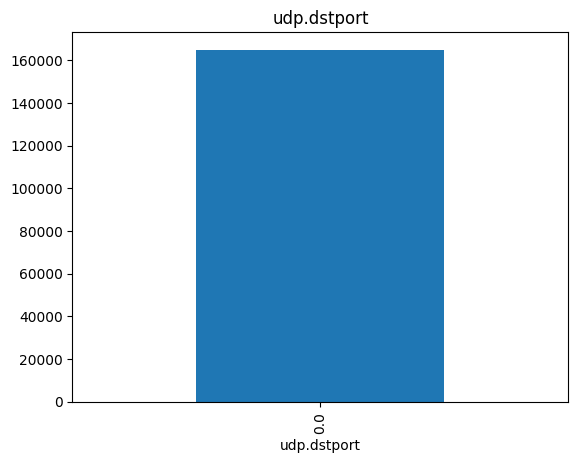

In [50]:
import matplotlib.pyplot as plt

for col in df.columns.drop('label'):
    if df[col].nunique() < 20:  # Arbitrary threshold for categories
        df[col].value_counts().plot(kind='bar')
        plt.title(col)
        plt.show()

In [43]:
print(df['port_no'].unique())
print(df['Protocol'].unique())
print(df['Pairflow'].unique())
print(df['src'].unique())
print(df['dst'].unique())

[0. 1.]
['TCP' 'UDP' 'ICMP']
[1.98925276e-01 1.98874582e-01 7.95396938e-02 9.94119436e-02
 3.97901247e-01 1.09145290e-01 6.54466187e-02 8.18716415e-02
 2.64625368e-02 7.90834432e-03 8.06042786e-03 2.08861401e-02
 9.88543040e-03 6.13403630e-03 6.23542533e-03 9.27709622e-03
 0.00000000e+00 3.33316435e-01 1.32109906e-01 1.99939167e-01
 7.92355267e-02 2.49974653e-01 9.90570820e-02 1.00000000e+00
 2.72077461e-01 8.20237250e-02 2.17682247e-01 6.55987022e-02
 2.43333671e-02 2.03791950e-02 1.99736389e-02 5.55104938e-02
 1.98164859e-01 3.28246984e-01 2.42573254e-01 4.84639562e-02
 6.05799452e-02 8.08070567e-02 2.07999594e-01 2.07948900e-01
 8.31390044e-02 1.03974450e-01 4.15948494e-01 2.36337828e-01
 1.41792558e-01 1.77228024e-01 5.06945149e-05]
['10.0.0.1' '10.0.0.7' '10.0.0.2' '10.0.0.3']
['10.0.0.7' '10.0.0.1' '10.0.0.2' '10.0.0.3']


In [52]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['src'] = encoder.fit_transform(df['src'])
df['dst'] = encoder.fit_transform(df['dst'])

In [53]:
df = pd.get_dummies(df, columns=['port_no', 'Protocol', 'Pairflow'], drop_first=True)

In [58]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/Minor_project6thsem/Datasets/DDoS SDN Tree/DDoS-SDN-Tree.csv")

# Print the number of columns in the original dataset
print("Original number of columns:", len(df.columns))
print(df.columns)

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
print("Number of numeric columns:", len(numeric_df.columns))
print(numeric_df.columns)

# Calculate the correlation matrix
corr = numeric_df.corr()
print("Number of columns in the correlation matrix:", len(corr.columns))
print(corr.columns)


Original number of columns: 35
Index(['dt', 'switch', 'src', 'dst', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'Protocol', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps',
       'rx_kbps', 'tot_kbps', 'frame.number', 'frame.time_epoch', 'frame.len',
       'eth.src', 'eth.dst', 'ip.proto', 'tcp.srcport', 'tcp.dstport',
       'tcp.analysis.ack_rtt', 'udp.srcport', 'udp.dstport',
       'frame.time_delta', 'label', 'interval_start'],
      dtype='object')
Number of numeric columns: 29
Index(['dt', 'switch', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows',
       'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow',
       'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps',
       'frame.number', 'frame.time_epoch', 'frame.len', 'tcp.srcport',
       'tcp.dstport', 'tcp.analysis.ack_rtt', 'udp.srcport', 'udp.dstport',
       'frame.time_delta', 'label', 'interval_start'],


Original number of columns: 35
Index(['dt', 'switch', 'src', 'dst', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'Protocol', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps',
       'rx_kbps', 'tot_kbps', 'frame.number', 'frame.time_epoch', 'frame.len',
       'eth.src', 'eth.dst', 'ip.proto', 'tcp.srcport', 'tcp.dstport',
       'tcp.analysis.ack_rtt', 'udp.srcport', 'udp.dstport',
       'frame.time_delta', 'label', 'interval_start'],
      dtype='object')
Number of numeric columns: 29
Index(['dt', 'switch', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows',
       'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow',
       'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps',
       'frame.number', 'frame.time_epoch', 'frame.len', 'tcp.srcport',
       'tcp.dstport', 'tcp.analysis.ack_rtt', 'udp.srcport', 'udp.dstport',
       'frame.time_delta', 'label', 'interval_start'],


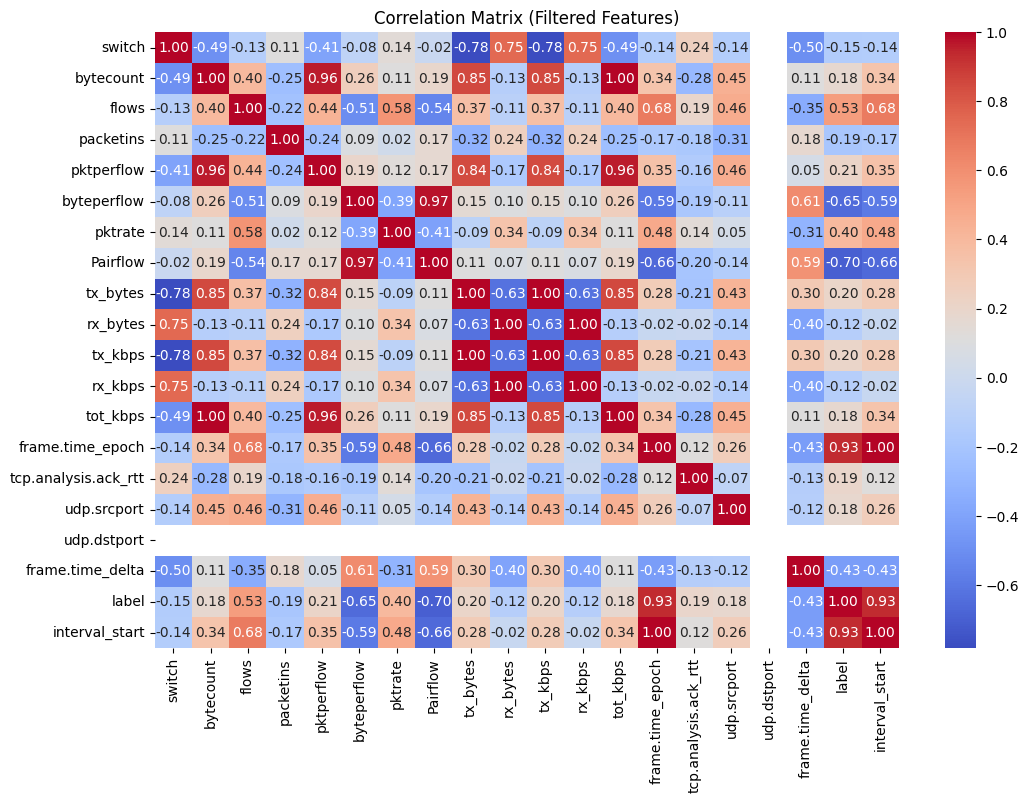

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/Minor_project6thsem/Datasets/DDoS SDN Tree/DDoS-SDN-Tree.csv")

# Print the number of columns in the original dataset
print("Original number of columns:", len(df.columns))
print(df.columns)

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
print("Number of numeric columns:", len(numeric_df.columns))
print(numeric_df.columns)

# Calculate the correlation matrix
corr = numeric_df.corr()
correlation_with_label = corr['label'].sort_values(ascending=False)
print("Correlation with 'label':\n", correlation_with_label)

# Drop features with correlation < 0.1 (absolute value)
low_corr_features = correlation_with_label[abs(correlation_with_label) < 0.1].index
filtered_numeric_df = numeric_df.drop(columns=low_corr_features)

# Print shape after dropping low-correlation features
print(f"Dropped features: {list(low_corr_features)}")
print(f"Remaining features: {list(filtered_numeric_df.columns)}")
print(f"Number of remaining features: {len(filtered_numeric_df.columns)}")

# Re-calculate the correlation matrix with filtered features
filtered_corr = filtered_numeric_df.corr()

# Plot heatmap for remaining features
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix (Filtered Features)")
plt.show()

In [60]:
df.shape

(164899, 35)

In [61]:
x = df.drop('label', axis=1)  # Features
y = df['label']  # Target variable

In [62]:
print(x.shape)
print(y.shape)

(164899, 34)
(164899,)


In [67]:
!pip install tensorflow
import tensorflow as tf # Import the TensorFlow library using the alias 'tf'

Recurrent Neural Networks (RNN) Model

In [85]:
from imblearn.over_sampling import SMOTE

# Define SMOTE
smote = SMOTE(random_state=42)

# Resample dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class balance
from collections import Counter
print(Counter(y_resampled))


Counter({0: 87281, 1: 87281})


In [106]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
#Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Minor_project6thsem/Datasets/DDoS SDN Tree/DDoS-SDN-Tree.csv")
# Remove non-numeric columns
df = df.select_dtypes(include=[np.number])


In [88]:
# Class distribution
print("Class distribution:\n", df['label'].value_counts())


Class distribution:
 label
1    87281
0    77618
Name: count, dtype: int64


In [89]:
# Select features and target
X = df.drop(columns=['label'])
y = df['label']

In [90]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [91]:
# Reshape data for RNN (samples, timesteps, features)
X_reshaped = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

In [92]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.3, random_state=42)

In [93]:
# Build RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [94]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [95]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
2886/2886 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9558 - loss: 0.1115 - val_accuracy: 1.0000 - val_loss: 2.1015e-04
Epoch 2/20
2886/2886 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 3.8732e-05
Epoch 3/20
2886/2886 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 1.0000 - loss: 1.2511e-04 - val_accuracy: 1.0000 - val_loss: 5.3035e-06
Epoch 4/20
2886/2886 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 3.2224e-06
Epoch 5/20
2886/2886 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 1.0000 - loss: 1.1507e-05 - val_accuracy: 1.0000 - val_loss: 8.9418e-07
Epoch 6/20
2886/2886 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 1.0000 - loss: 9.8527e-04 - val_accuracy: 1.0000 - val_loss: 4.5298e-07
Epoch 7/20
2886/2886 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 1.0000 - loss: 3.1045e-06 - val_accuracy: 1.0000 - val_loss: 1.0360e-07
Epoch 8/20
2886/2886 ━━━━━━━━━━━━━━━━━━━

In [96]:
# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype('int32')
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

1546/1546 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Model Accuracy: 1.00


In [97]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[23325     1]
 [    0 26144]]


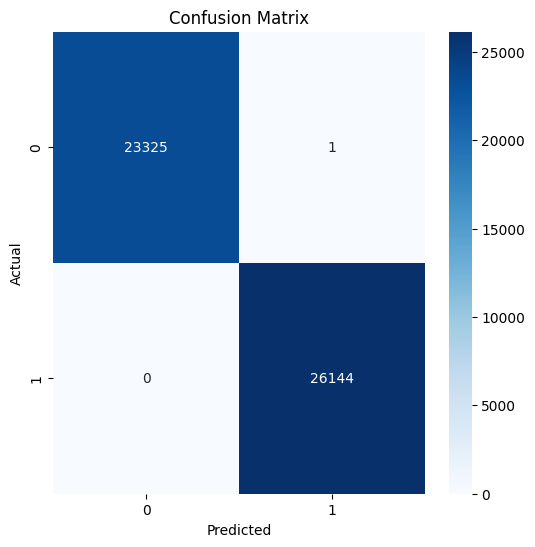

In [104]:
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [100]:
# Classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23326
           1       1.00      1.00      1.00     26144

    accuracy                           1.00     49470
   macro avg       1.00      1.00      1.00     49470
weighted avg       1.00      1.00      1.00     49470



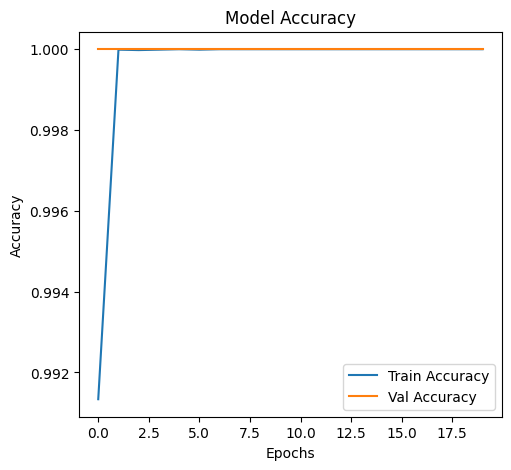

In [103]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

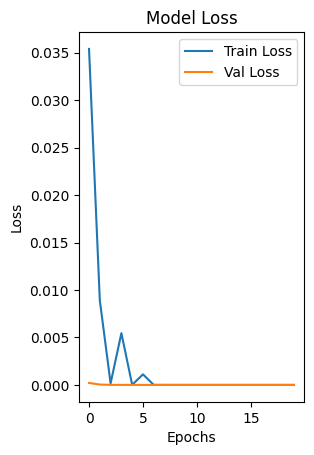

In [101]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1D CNN- 1D Convolutional Neural Network Model

In [105]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


In [107]:
#Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Minor_project6thsem/Datasets/DDoS SDN Tree/DDoS-SDN-Tree.csv")

In [108]:
# Remove non-numeric columns
df = df.select_dtypes(include=[np.number])


In [109]:
# Ensure labels are integers
df['label'] = df['label'].astype(np.int64)


In [110]:
# Class distribution
print("Original class distribution:\n", df['label'].value_counts())

Original class distribution:
 label
1    87281
0    77618
Name: count, dtype: int64


In [111]:
# Select features and target
X = df.drop(columns=['label'])
y = df['label']

In [112]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [113]:
# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [115]:
# Check new class distribution
from collections import Counter
print("Balanced class distribution:", Counter(y_resampled))

Balanced class distribution: Counter({0: 87281, 1: 87281})


In [116]:
# Ensure target labels are integers
y_resampled = y_resampled.astype(np.int64)


In [117]:
# Reshape data for 1D CNN (samples, timesteps, features)
X_reshaped = np.reshape(X_resampled, (X_resampled.shape[0], X_resampled.shape[1], 1))

In [118]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_resampled, test_size=0.3, random_state=42)


In [119]:
# Build 1D CNN model
model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [120]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [121]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8330 - loss: 0.3627 - val_accuracy: 0.9789 - val_loss: 0.0972
Epoch 2/20
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9774 - loss: 0.0827 - val_accuracy: 0.9961 - val_loss: 0.0281
Epoch 3/20
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9868 - loss: 0.0599 - val_accuracy: 0.9919 - val_loss: 0.0254
Epoch 4/20
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9889 - loss: 0.0389 - val_accuracy: 0.9993 - val_loss: 0.0096
Epoch 5/20
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9887 - loss: 0.0815 - val_accuracy: 0.9994 - val_loss: 0.0080
Epoch 6/20
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9903 - loss: 0.0337 - val_accuracy: 0.9999 - val_loss: 0.0017
Epoch 7/20
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9939 - loss: 0.0257 - val_accuracy: 0.9998 - val_loss: 0.0044
Epoch 8/20
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9943 - loss: 0.

In [122]:
# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype('int32')
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

1637/1637 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Model Accuracy: 1.00


In [123]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[26055     4]
 [    1 26309]]


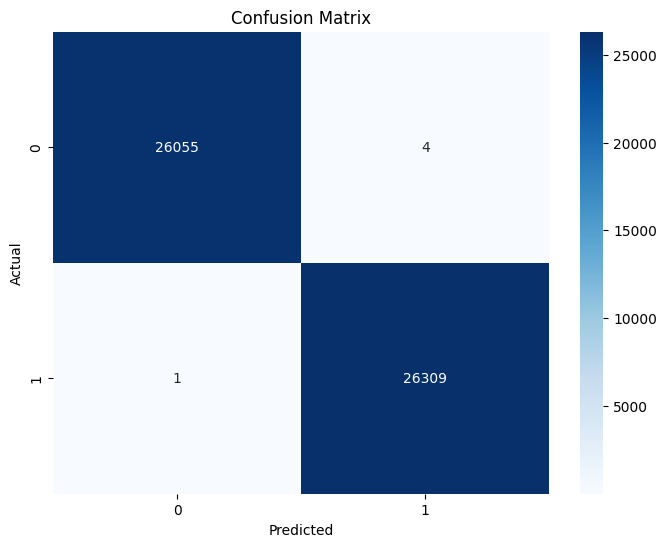

In [124]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [125]:
# Classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     26059
           1       1.00      1.00      1.00     26310

    accuracy                           1.00     52369
   macro avg       1.00      1.00      1.00     52369
weighted avg       1.00      1.00      1.00     52369



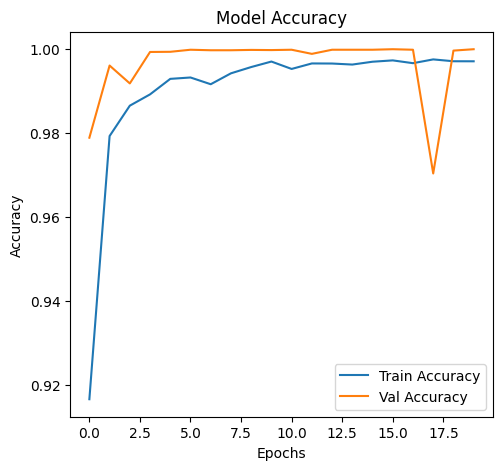

In [126]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


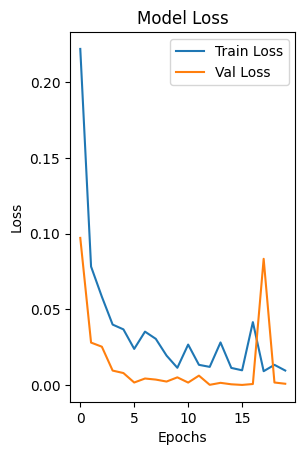

In [127]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Fully Connected Neural Network (FCNN)  Model

In [128]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


In [129]:
#Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Minor_project6thsem/Datasets/DDoS SDN Tree/DDoS-SDN-Tree.csv")

In [130]:
# Remove non-numeric columns
df = df.select_dtypes(include=[np.number])


In [131]:
# Ensure labels are integers
df['label'] = df['label'].astype(np.int64)


In [132]:
# Class distribution
print("Original class distribution:\n", df['label'].value_counts())

Original class distribution:
 label
1    87281
0    77618
Name: count, dtype: int64


In [133]:
# Select features and target
X = df.drop(columns=['label'])
y = df['label']


In [134]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [135]:
# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [136]:
# Check new class distribution
from collections import Counter
print("Balanced class distribution:", Counter(y_resampled))

Balanced class distribution: Counter({0: 87281, 1: 87281})


In [137]:
# Ensure target labels are integers
y_resampled = y_resampled.astype(np.int64)

In [138]:
# Reshape data for 1D CNN (samples, timesteps, features)
X_reshaped = np.reshape(X_resampled, (X_resampled.shape[0], X_resampled.shape[1], 1))

In [139]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_resampled, test_size=0.3, random_state=42)

In [147]:
# Build FCNN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


In [148]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [149]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9888 - loss: 0.0451 - val_accuracy: 1.0000 - val_loss: 9.7108e-07
Epoch 2/20
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 1.0000 - loss: 0.0214 - val_accuracy: 1.0000 - val_loss: 7.2480e-08
Epoch 3/20
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 1.0000 - loss: 3.7088e-06 - val_accuracy: 1.0000 - val_loss: 6.3426e-09
Epoch 4/20
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 1.0000 - loss: 8.6042e-07 - val_accuracy: 1.0000 - val_loss: 4.3040e-10
Epoch 5/20
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 1.0000 - loss: 2.1218e-07 - val_accuracy: 1.0000 - val_loss: 2.2763e-11
Epoch 6/20
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 1.0000 - loss: 3.2416e-08 - val_accuracy: 1.0000 - val_loss: 1.5584e-12
Epoch 7/20
3055/3055 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 1.0000 - loss: 1.4541e-08 - val_accuracy: 1.0000 - val_loss: 1.1394e-13
Epoch 8/20
3055/3055 ━━━━━━━━━━━━━━━

In [150]:
# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype('int32')
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

1637/1637 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Model Accuracy: 1.00


In [151]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[26058     1]
 [    0 26310]]


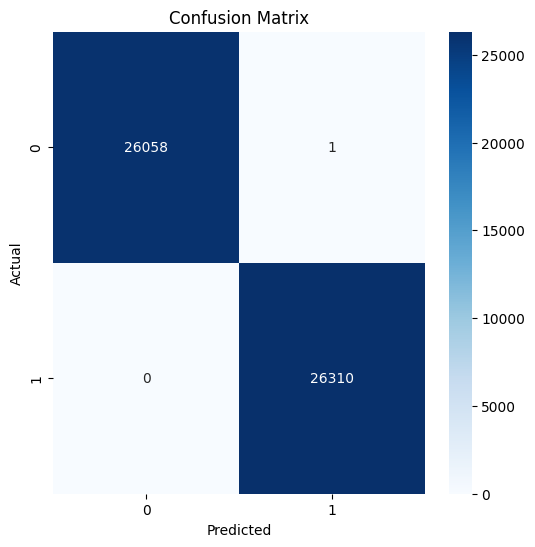

In [153]:
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [154]:
# Classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     26059
           1       1.00      1.00      1.00     26310

    accuracy                           1.00     52369
   macro avg       1.00      1.00      1.00     52369
weighted avg       1.00      1.00      1.00     52369



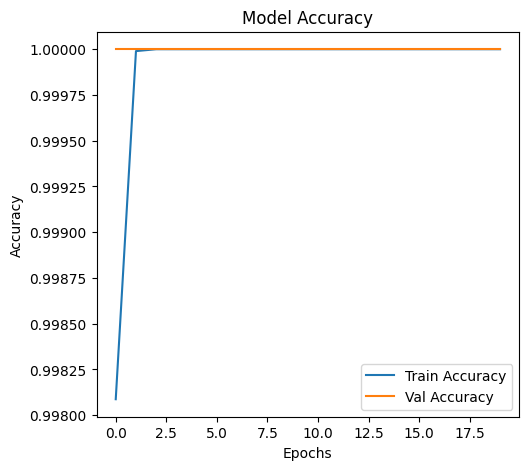

In [155]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


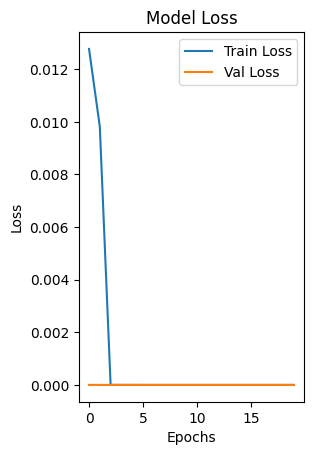

In [156]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
